## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, boxcox, shapiro
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')
import seaborn as sns

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The data skew heavily to the right thanks to a relatively small number of varied high values, which impact the mean noticably: while the data's median is around $9,000, then mean is several thousand dollars higher.

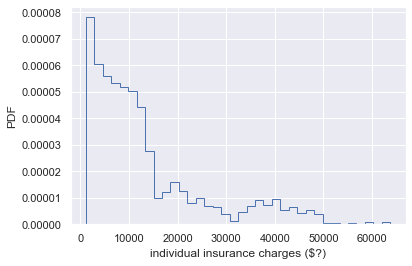

mean of charges: 13270.422265141257
standard deviation of charges: 12105.484975561612


In [4]:
sns.set()
charges = medical['charges']
plt.hist(charges, bins=int(np.sqrt(len(charges))), density=True, histtype='step')
plt.xlabel('individual insurance charges ($?)')
plt.ylabel('PDF')
plt.show()

mean = np.mean(charges)
standard_deviation = np.std(charges)

print('mean of charges:', mean)
print('standard deviation of charges:', standard_deviation)

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed above, to apply?

__A:__ A significance test based on a univariate t interval should provide 95% confidence about whether or not the average has changed, because it's possible to construct a relatively  normal sampling distribution of a sample mean from the data set, even though the data set itself skews so far to the right:

To meet the conditions for normality, the sampling distribution we'll test must meet three conditions: (1) each sample must be randomly chosen (as assumed in the question), (2) each sample must average 30 or more values (we will average many  more than 30), and (3) the sample size must be less than or equal to 10% of the whole data set to preserve independence.

After construction this sampling distribution, the following confidence interval can be constructed from the mean of the sampling distribution (equal to the mean of the population) and the standard error of the samples as measured against the mean assumed in our null hypothesis (a mean charge of $12,0000).

\begin{equation}
\bar x \pm t * \frac{s}{\sqrt{n}}
\end{equation}

The significance test's hypotheses should be as follows, as assesed with an assumed significance level $\alpha$ of 0.05:

$H_0: \mu = \$12,000$

$H_a: \mu < \$12,000$

If the t test's $p$ value is less than 0.05, we reject the null hypothesis, and the mean value has changed. If it is more than 0.05, we fail to reject the null hypothesis and don't have sufficient information to conclude that the mean has changed.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned.

__A:__ Because the administrator is only concerned about the value being less than expected, this is a one-sided interval. First, we construct the sampling distribution of the sample mean by plotting successive averages of 10% of the data:

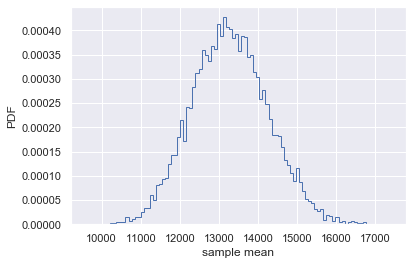

In [197]:
# construct the sampling distribution by averaging 10% of the data over and over and plotting the value

trials = 10000
sample_means = np.empty(trials)
sample_size = int(.1*len(charges))
for i in range(trials):
    choices = np.random.choice(charges, size=sample_size, replace=False) # choose ten percent of the data randomly
    sample_means[i] = np.mean(choices)
    
plt.hist(sample_means, bins=int(np.sqrt(len(sample_means))), density=True, histtype='step')
plt.xlabel('sample mean')
plt.ylabel('PDF')
plt.show()

Now we want to derive a confidence interval from the sampling distribution of the sample mean. We would calculate the critical value z using values that assume the null hypothesis to be true,

\begin{equation}
z = \frac{\bar x - \mu_o}{\sigma_{x}}
\end{equation}

...where $\bar x$ is the mean of the sampling distribution, $\mu_0$ is the null hypothesis's assumed mean, and $\sigma_{x}$ would be the standard deviation of the population...except that we don't have that.

So instead, we estimate the population's standard deviation by taking the sampling distribution's standard deviation $s$ and dividing by the square root of the sample size $n$, which gives the following altered formula:

\begin{equation}
t = \frac{\bar x - \mu_o}{\frac{s_{\bar x}}{\sqrt{n}}}
\end{equation}

This value tells us how many standard deviations from the assumed mean the sampling distribution's mean is. We calculate it this way:

In [198]:
sampling_distribution_mean = np.mean(sample_means)
sampling_distribution_s = np.std(sample_means)
tee = (sampling_distribution_mean - 12000) / (sampling_distribution_s / np.sqrt(sample_size))
print('The critical value t is ' + str(sampling_distribution_t) + ' standard deviations.')

The critical value t is 14.528727779731994 standard deviations.


From the $t$ value, we can derive the 95% confidence interval as:

\begin{equation}
\mu_x \pm t * \frac{s_{\bar x}}{\sqrt{n}}
\end{equation}

...where $\mu_x$ is $12,000, because we've assumed the null hypothesis true in the test.

In [208]:
tee = t.cdf(.975, sample_size - 1, loc=12000, scale=sampling_distribution_s)
lower_confidence_value = 12000 - tee * sampling_distribution_s / np.sqrt(sample_size)
upper_confidence_value = 12000 + tee * sampling_distribution_s / np.sqrt(sample_size)
tee
# print(lower_confidence_value)
# print(upper_confidence_value)

1.0238095130898343e-23

In [209]:
t?

With 95% confidence, the true value of the mean charge lies within the range $\$10,733 \leq \mu_x \leq \$13,266$.

With this interval in mind, we finally derive a $p$ value from the sampling distribution's mean value, to see how likely we would be to get this value assuming the null hypothesis true. 

In [202]:
p = t.cdf(10733, sample_size - 1, loc=12000, scale=sampling_distribution_s)
p

0.09978442519820327

Because $p \gt 0.05$, we fail to reject the null hypothesis: we do not have substantial evidence that the mean charge has shifted from $12,000, and **the administrator should not be concerned**.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption, or assumptions, are we making here?

__A:__

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and that is much easier to use. All you need to do is pass it your data.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you have good hands-on experience of
* how you can use the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* how to then perform inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test